In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
# loading our networks
G_fb = nx.read_edgelist("Group7/Facebook-Ego/1912.edges", create_using = nx.Graph(), nodetype = int)
random.seed(42)
nodes = list(G_fb.nodes())
fb_nodes1 = random.sample(nodes, 50)
fb_nodes2 = random.sample([node for node in nodes if node not in fb_nodes1], 50)

In [3]:
# a) Compute the cut size and conductance of the cut for the two sets of nodes
cut_size = nx.cut_size(G_fb, fb_nodes1, fb_nodes2)
conductance = nx.conductance(G_fb, fb_nodes1, fb_nodes2)

print(f"Cut size: {cut_size}")
print(f"Conductance: {conductance}")

Cut size: 287
Conductance: 0.3806366047745358


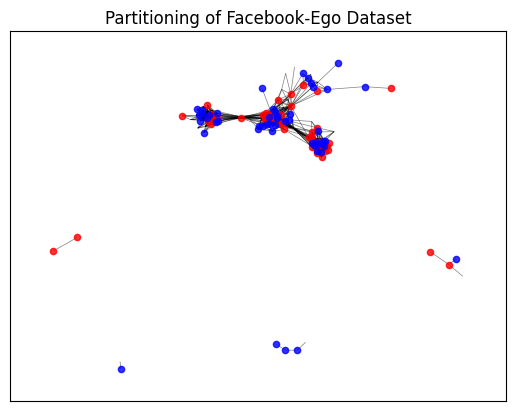

In [4]:
# Plot the partitioning
pos = nx.spring_layout(G_fb)
nx.draw_networkx_nodes(G_fb, pos, nodelist=fb_nodes1, node_color='r', node_size=20, alpha=0.8)
nx.draw_networkx_nodes(G_fb, pos, nodelist=fb_nodes2, node_color='b', node_size=20, alpha=0.8)
nx.draw_networkx_edges(G_fb, pos, width=0.5, alpha=0.5)
plt.title('Partitioning of Facebook-Ego Dataset')
plt.show()



Cut size: 316
Conductance: 0.38303030303030305


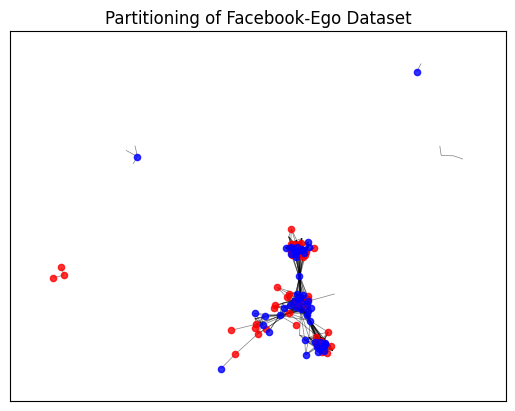

In [5]:
# b) the cut size and conductance with a different random partitioning
random.seed(49)
nodes = list(G_fb.nodes())
fb_nodes1 = random.sample(nodes, 50)
fb_nodes2 = random.sample([node for node in nodes if node not in fb_nodes1], 50)

cut_size_b = nx.cut_size(G_fb, fb_nodes1, fb_nodes2)
conductance_b = nx.conductance(G_fb, fb_nodes1, fb_nodes2)

print(f"Cut size: {cut_size_b}")
print(f"Conductance: {conductance_b}")

# Plot the partitioning
pos = nx.spring_layout(G_fb)
nx.draw_networkx_nodes(G_fb, pos, nodelist=fb_nodes1, node_color='r', node_size=20, alpha=0.8)
nx.draw_networkx_nodes(G_fb, pos, nodelist=fb_nodes2, node_color='b', node_size=20, alpha=0.8)
nx.draw_networkx_edges(G_fb, pos, width=0.5, alpha=0.5)
plt.title('Partitioning of Facebook-Ego Dataset')
plt.show()


In [6]:
# Compare with the previous results
print("Differences observed:")
print(f"Difference in cut size: {cut_size_b - cut_size}")
print(f"Difference in conductance: {conductance_b - conductance}")

Differences observed:
Difference in cut size: 29
Difference in conductance: 0.0023936982557672404


The differences in cut size and conductance arise from the varying connectivity patterns in the randomly selected node sets. As each set's composition changes, the number of edges connecting the partitions fluctuates, impacting the cut size and the conductance. Therefore, these distinctions emphasize how the choice of starting nodes significantly affects the outcome of the partitioning process.

In [7]:
# c) Compute the Laplacian matrix
laplacian_matrix = nx.laplacian_matrix(G_fb).todense()

print("Laplacian matrix of the Facebook-Ego dataset:")
print(laplacian_matrix)

Laplacian matrix of the Facebook-Ego dataset:
[[24 -1  0 ...  0  0  0]
 [-1 40  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


In [8]:
# d) Find all cliques
all_cliques = list(nx.find_cliques(G_fb))

print("List of 10 cliques over the entire Facebook-Ego dataset:")
print(all_cliques[:10])


List of 10 cliques over the entire Facebook-Ego dataset:
[[2049, 1978, 1936, 1990, 2047], [2049, 1975, 1936, 2035], [2049, 1975, 1936, 1990, 2047], [2049, 1975, 1930, 2035], [2049, 1975, 1930, 2047], [2049, 1975, 1965], [2050, 1951, 2018, 1995, 2000, 1998], [2050, 1951, 2018, 1995, 1980, 1973], [2050, 1951, 2018, 1995, 1980, 1998], [2050, 1951, 2018, 2022, 2000, 1998]]


In [9]:

print("Number of cliques over the entire Facebook-Ego dataset:", len(all_cliques))

Number of cliques over the entire Facebook-Ego dataset: 739
